In [48]:
import numpy as np
import pandas as pd
from datetime import datetime
import json
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [49]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column width

In [50]:
genre = pd.read_csv("C:/Users/Ng Yong Jian/OneDrive - Nanyang Technological University/Desktop/NTU/Y3S1/SC4020 Data Analytics & Mining/Assignment/Assignment1/genre_train_trimmed.csv", dtype='float16')
genre.fillna(0, inplace=True)
genre = genre.astype('int8')
genre.head()

,genres_0,genres_87,genres_94,genres_95,genres_102,genres_109,genres_118,genres_125,genres_132,genres_139,genres_152,genres_159,genres_166,genres_177,genres_184,genres_191,genres_198,genres_205,genres_212,genres_242,genres_252,genres_275,genres_282,genres_289,genres_296,genres_303,genres_310,genres_317,genres_324,genres_331,genres_338,genres_352,genres_359,genres_367,genres_374,genres_381,genres_388,genres_402,genres_409,genres_416,genres_423,genres_430,genres_437,genres_444,genres_451,genres_458,genres_465,genres_474,genres_481,genres_488,genres_495,genres_502,genres_509,genres_516,genres_531,genres_538,genres_545,genres_649,genres_656,genres_663,genres_670,genres_677,genres_691,genres_698,genres_712,genres_719,genres_726,genres_744,genres_751,genres_758,genres_765,genres_779,genres_786,genres_798,genres_808,genres_815,genres_822,genres_829,genres_843,genres_850,genres_857,genres_864,genres_873,genres_880,genres_893,genres_900,genres_907,genres_921,genres_940,genres_947,genres_958,genres_965,genres_972,genres_979,genres_986,genres_993,genres_1000,genres_1007,genres_1011,genres_1019,genres_1026,genres_1033,genres_1040,genres_1047,genres_1054,genres_1061,genres_1068,genres_1082,genres_1089,genres_1096,genres_1103,genres_1110,genres_1117,genres_1124,genres_1131,genres_1138,genres_1145,genres_1152,genres_1155,genres_1162,genres_1169,genres_1180,genres_1187,genres_1194,genres_1201,genres_1208,genres_1259,genres_1266,genres_1273,genres_1280,genres_1287,genres_1568,genres_1572,genres_1579,genres_1598,genres_1605,genres_1609,genres_1616,genres_1630,genres_1633,genres_1944,genres_1949,genres_1955,genres_1965,genres_1969,genres_1970,genres_1977,genres_1981,genres_1988,genres_1995,genres_2002,genres_2008,genres_2015,genres_2022,genres_2029,genres_2032,genres_2045,genres_2052,genres_2058,genres_2065,genres_2072,genres_2079,genres_2086,genres_2093,genres_2100,genres_2107,genres_2109,genres_2116,genres_2122,genres_2127,genres_2130,genres_2144,genres_2150,genres_2154,genres_2157,genres_2163,genres_2168,genres_2172,genres_2175,genres_2176,genres_2183,genres_2189,genres_2191,genres_2192,genres_2194,genres_2206,genres_2213,genres_2215,genres_2219,genres_2238,genres_2245,genres_2248
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [51]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475484 entries, 0 to 1475483
Columns: 192 entries, genres_0 to genres_2248
dtypes: int8(192)
memory usage: 270.2 MB


In [52]:
genre['RowSum'] = genre.sum(axis=1)
print(genre[genre['RowSum'] < 1])

         genres_0  genres_87  genres_94  genres_95  genres_102  genres_109  \
15              0          0          0          0           0           0   
17              0          0          0          0           0           0   
43              0          0          0          0           0           0   
73              0          0          0          0           0           0   
190             0          0          0          0           0           0   
...           ...        ...        ...        ...         ...         ...   
1475222         0          0          0          0           0           0   
1475244         0          0          0          0           0           0   
1475295         0          0          0          0           0           0   
1475385         0          0          0          0           0           0   
1475475         0          0          0          0           0           0   

         genres_118  genres_125  genres_132  genres_139  genres

In [53]:
others= pd.read_csv("C:/Users/Ng Yong Jian/OneDrive - Nanyang Technological University/Desktop/NTU/Y3S1/SC4020 Data Analytics & Mining/Assignment/Assignment1/others_train_trimmed.csv")
others.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,artist_name,composer,lyricist,language
0,bIk7tyRBrGreFORvFciaDJcHGZZ1SexkR76UoIFQRHY=,GjPHHAizLmTchyg3RQ9idiJ/UhHNzGSZDUuDhMMq2WU=,my library,Local playlist more,local-library,1,281936.0,音樂紓壓進階版‧自律神經全方位調節系列,李欣芸,NaN,-1.0
1,Ttv29hmA53JJARqViA38zz8a9Coaum7ReOTvK1o5KGk=,jytUXkpgrHjnAKtkTYf/AwB07OlQS5UxMax1R9xh3v8=,my library,Local playlist more,local-library,0,234289.0,Pitbull,NaN,NaN,52.0
2,PuBpr/uQMDvSlsS98cMyZ5xhpAInFBqGNp83dREG11A=,w2VV6harF+FhjWe2kPxDa/tukkq42mqgyY/3Gs+MWO8=,my library,Local playlist more,local-playlist,1,272253.0,楊丞琳 (Rainie Yang),張向榮/魏文浩,姚若龍,3.0
3,MtIjT7HQJNHETpHMn+BH81cECincKxBCRkppgX6tgGw=,1tamSJ2LINN8yc7GnTKkxi5D+2I3mWM+NhJxmKHCh/8=,my library,Local playlist more,local-playlist,1,198855.0,2PM,Won Kim,Won Kim,31.0
4,VvyhS0HkNHftI4FSO20YuhdYzj85pWdpeNRp+OILG6o=,5myS1WHBGGzoGGXLLGo/tIuHzWsyp0Ez0NoLWKdkA9Y=,my library,Local playlist more,local-library,1,264254.0,BIGBANG,G-DRAGON/P.K/DEE.P,G-DRAGON,31.0


In [54]:
others.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475484 entries, 0 to 1475483
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   msno                1475484 non-null  object 
 1   song_id             1475484 non-null  object 
 2   source_system_tab   1470482 non-null  object 
 3   source_screen_name  1392479 non-null  object 
 4   source_type         1471165 non-null  object 
 5   target              1475484 non-null  int64  
 6   song_length         1475464 non-null  float64
 7   artist_name         1475464 non-null  object 
 8   composer            1141030 non-null  object 
 9   lyricist            840135 non-null   object 
 10  language            1475456 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 123.8+ MB


In [55]:
s = others['artist_name']
labels, levels_artist = pd.factorize(s)
others['artist_name'] = pd.Series(labels)

s = others['song_id']
labels, levels_songs = pd.factorize(s)
others['song_id'] = pd.Series(labels)

s = others['msno']
labels, levels_msno = pd.factorize(s)
others['msno'] = pd.Series(labels)

s = others['composer']
labels, levels_composer = pd.factorize(s)
others['composer'] = pd.Series(labels)

s = others['lyricist']
labels, levels_lyricist = pd.factorize(s)
others['lyricist'] = pd.Series(labels)

del s

In [57]:
others['language'].fillna(0, inplace=True)

In [58]:
others['msno'] = others['msno'].astype('int32')
others['song_id'] = others['song_id'].astype('int32')
others['target'] = others['target'].astype('int8')
others['artist_name'] = others['artist_name'].astype('int32')
others['language'] = others['language'].astype('int16')
others['composer'] = others['composer'].astype('int32')
others['lyricist'] = others['lyricist'].astype('int32')

In [59]:
data = pd.concat([others, genre], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475484 entries, 0 to 1475483
Columns: 204 entries, msno to RowSum
dtypes: float64(1), int16(1), int32(5), int64(1), int8(193), object(3)
memory usage: 358.8+ MB


In [60]:
data = data[data['RowSum'] > 0]
len(data)

1451871

In [61]:
data

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,artist_name,composer,lyricist,language,genres_0,genres_87,genres_94,genres_95,genres_102,genres_109,genres_118,genres_125,genres_132,genres_139,genres_152,genres_159,genres_166,genres_177,genres_184,genres_191,genres_198,genres_205,genres_212,genres_242,genres_252,genres_275,genres_282,genres_289,genres_296,genres_303,genres_310,genres_317,genres_324,genres_331,genres_338,genres_352,genres_359,genres_367,genres_374,genres_381,genres_388,genres_402,genres_409,genres_416,genres_423,genres_430,genres_437,genres_444,genres_451,genres_458,genres_465,genres_474,genres_481,genres_488,genres_495,genres_502,genres_509,genres_516,genres_531,genres_538,genres_545,genres_649,genres_656,genres_663,genres_670,genres_677,genres_691,genres_698,genres_712,genres_719,genres_726,genres_744,genres_751,genres_758,genres_765,genres_779,genres_786,genres_798,genres_808,genres_815,genres_822,genres_829,genres_843,genres_850,genres_857,genres_864,genres_873,genres_880,genres_893,genres_900,genres_907,genres_921,genres_940,genres_947,genres_958,genres_965,genres_972,genres_979,genres_986,genres_993,genres_1000,genres_1007,genres_1011,genres_1019,genres_1026,genres_1033,genres_1040,genres_1047,genres_1054,genres_1061,genres_1068,genres_1082,genres_1089,genres_1096,genres_1103,genres_1110,genres_1117,genres_1124,genres_1131,genres_1138,genres_1145,genres_1152,genres_1155,genres_1162,genres_1169,genres_1180,genres_1187,genres_1194,genres_1201,genres_1208,genres_1259,genres_1266,genres_1273,genres_1280,genres_1287,genres_1568,genres_1572,genres_1579,genres_1598,genres_1605,genres_1609,genres_1616,genres_1630,genres_1633,genres_1944,genres_1949,genres_1955,genres_1965,genres_1969,genres_1970,genres_1977,genres_1981,genres_1988,genres_1995,genres_2002,genres_2008,genres_2015,genres_2022,genres_2029,genres_2032,genres_2045,genres_2052,genres_2058,genres_2065,genres_2072,genres_2079,genres_2086,genres_2093,genres_2100,genres_2107,genres_2109,genres_2116,genres_2122,genres_2127,genres_2130,genres_2144,genres_2150,genres_2154,genres_2157,genres_2163,genres_2168,genres_2172,genres_2175,genres_2176,genres_2183,genres_2189,genres_2191,genres_2192,genres_2194,genres_2206,genres_2213,genres_2215,genres_2219,genres_2238,genres_2245,genres_2248,RowSum
0,0,0,my library,Local playlist more,local-library,1,281936.0,0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,1,1,my library,Local playlist more,local-library,0,234289.0,1,-1,-1,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,2,my library,Local playlist more,local-playlist,1,272253.0,2,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,3,my library,Local playlist more,local-playlist,1,198855.0,3,2,1,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [62]:
columns_to_drop = ['msno', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'RowSum']
music_data = data.drop(columns = columns_to_drop, axis = 1)
music_data

,song_id,song_length,artist_name,composer,lyricist,language,genres_0,genres_87,genres_94,genres_95,genres_102,genres_109,genres_118,genres_125,genres_132,genres_139,genres_152,genres_159,genres_166,genres_177,genres_184,genres_191,genres_198,genres_205,genres_212,genres_242,genres_252,genres_275,genres_282,genres_289,genres_296,genres_303,genres_310,genres_317,genres_324,genres_331,genres_338,genres_352,genres_359,genres_367,genres_374,genres_381,genres_388,genres_402,genres_409,genres_416,genres_423,genres_430,genres_437,genres_444,genres_451,genres_458,genres_465,genres_474,genres_481,genres_488,genres_495,genres_502,genres_509,genres_516,genres_531,genres_538,genres_545,genres_649,genres_656,genres_663,genres_670,genres_677,genres_691,genres_698,genres_712,genres_719,genres_726,genres_744,genres_751,genres_758,genres_765,genres_779,genres_786,genres_798,genres_808,genres_815,genres_822,genres_829,genres_843,genres_850,genres_857,genres_864,genres_873,genres_880,genres_893,genres_900,genres_907,genres_921,genres_940,genres_947,genres_958,genres_965,genres_972,genres_979,genres_986,genres_993,genres_1000,genres_1007,genres_1011,genres_1019,genres_1026,genres_1033,genres_1040,genres_1047,genres_1054,genres_1061,genres_1068,genres_1082,genres_1089,genres_1096,genres_1103,genres_1110,genres_1117,genres_1124,genres_1131,genres_1138,genres_1145,genres_1152,genres_1155,genres_1162,genres_1169,genres_1180,genres_1187,genres_1194,genres_1201,genres_1208,genres_1259,genres_1266,genres_1273,genres_1280,genres_1287,genres_1568,genres_1572,genres_1579,genres_1598,genres_1605,genres_1609,genres_1616,genres_1630,genres_1633,genres_1944,genres_1949,genres_1955,genres_1965,genres_1969,genres_1970,genres_1977,genres_1981,genres_1988,genres_1995,genres_2002,genres_2008,genres_2015,genres_2022,genres_2029,genres_2032,genres_2045,genres_2052,genres_2058,genres_2065,genres_2072,genres_2079,genres_2086,genres_2093,genres_2100,genres_2107,genres_2109,genres_2116,genres_2122,genres_2127,genres_2130,genres_2144,genres_2150,genres_2154,genres_2157,genres_2163,genres_2168,genres_2172,genres_2175,genres_2176,genres_2183,genres_2189,genres_2191,genres_2192,genres_2194,genres_2206,genres_2213,genres_2215,genres_2219,genres_2238,genres_2245,genres_2248
0,0,281936.0,0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,234289.0,1,-1,-1,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,272253.0,2,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,198855.0,3,2,1,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,264254.0,4,3,2,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [64]:
variables_columns = [col for col in music_data.columns if col != 'song_id']

scaler = StandardScaler()
music_data[variables_columns] = scaler.fit_transform(music_data[variables_columns])

In [65]:
music_data.head()

,song_id,song_length,artist_name,composer,lyricist,language,genres_0,genres_87,genres_94,genres_95,genres_102,genres_109,genres_118,genres_125,genres_132,genres_139,genres_152,genres_159,genres_166,genres_177,genres_184,genres_191,genres_198,genres_205,genres_212,genres_242,genres_252,genres_275,genres_282,genres_289,genres_296,genres_303,genres_310,genres_317,genres_324,genres_331,genres_338,genres_352,genres_359,genres_367,genres_374,genres_381,genres_388,genres_402,genres_409,genres_416,genres_423,genres_430,genres_437,genres_444,genres_451,genres_458,genres_465,genres_474,genres_481,genres_488,genres_495,genres_502,genres_509,genres_516,genres_531,genres_538,genres_545,genres_649,genres_656,genres_663,genres_670,genres_677,genres_691,genres_698,genres_712,genres_719,genres_726,genres_744,genres_751,genres_758,genres_765,genres_779,genres_786,genres_798,genres_808,genres_815,genres_822,genres_829,genres_843,genres_850,genres_857,genres_864,genres_873,genres_880,genres_893,genres_900,genres_907,genres_921,genres_940,genres_947,genres_958,genres_965,genres_972,genres_979,genres_986,genres_993,genres_1000,genres_1007,genres_1011,genres_1019,genres_1026,genres_1033,genres_1040,genres_1047,genres_1054,genres_1061,genres_1068,genres_1082,genres_1089,genres_1096,genres_1103,genres_1110,genres_1117,genres_1124,genres_1131,genres_1138,genres_1145,genres_1152,genres_1155,genres_1162,genres_1169,genres_1180,genres_1187,genres_1194,genres_1201,genres_1208,genres_1259,genres_1266,genres_1273,genres_1280,genres_1287,genres_1568,genres_1572,genres_1579,genres_1598,genres_1605,genres_1609,genres_1616,genres_1630,genres_1633,genres_1944,genres_1949,genres_1955,genres_1965,genres_1969,genres_1970,genres_1977,genres_1981,genres_1988,genres_1995,genres_2002,genres_2008,genres_2015,genres_2022,genres_2029,genres_2032,genres_2045,genres_2052,genres_2058,genres_2065,genres_2072,genres_2079,genres_2086,genres_2093,genres_2100,genres_2107,genres_2109,genres_2116,genres_2122,genres_2127,genres_2130,genres_2144,genres_2150,genres_2154,genres_2157,genres_2163,genres_2168,genres_2172,genres_2175,genres_2176,genres_2183,genres_2189,genres_2191,genres_2192,genres_2194,genres_2206,genres_2213,genres_2215,genres_2219,genres_2238,genres_2245,genres_2248
0,0,0.547351,-0.455782,-0.449591,-0.376943,-0.930816,0.0,0.0,-0.008004,-0.003422,-0.002033,-0.068084,-0.011912,-0.063392,0.0,-0.119689,0.0,0.0,0.0,-0.00249,-0.002347,-0.003422,-0.002196,-0.001856,-0.004695,-0.027385,-0.00166,-0.027017,-0.002992,0.0,0.0,0.0,-0.003712,0.0,0.0,0.0,0.0,-0.022825,-0.127379,-0.010063,-0.019235,-0.00733,-0.023888,-0.00083,-0.016265,-0.001174,-0.023583,-0.04601,-0.090976,-0.201239,-0.094608,-0.469858,-1.061608,-0.011738,-0.024711,-0.001437,0.0,-0.002033,-0.007091,-0.017995,-0.007515,0.0,-0.019538,-0.002196,-0.002196,0.0,-0.001437,0.0,-0.047146,-0.009994,-0.001174,-0.002347,-0.06106,-0.001437,-0.002347,0.0,0.0,0.0,10.323656,-0.037914,-0.002196,0.0,-0.006691,-0.040606,-0.031814,-0.032448,-0.030979,-0.031781,-0.034087,-0.024458,-0.023873,-0.010333,-0.004768,-0.244423,-0.033453,14.523121,-0.091872,-0.004232,-0.00398,-0.002992,-0.002992,-0.002347,-0.001174,-0.002875,-0.074678,-0.002196,-0.00166,-0.001437,-0.005505,-0.005249,-0.00332,0.0,-0.00166,-0.008705,0.0,-0.003214,-0.002347,-0.001437,-0.001174,0.0,-0.00083,-0.009463,-0.00491,-0.044629,-0.006211,-0.001174,-0.001856,-0.027221,0.0,0.0,-0.00083,-0.005183,-0.190112,-0.001174,-0.004469,-0.002753,-0.029166,-0.003618,-0.027309,0.0,-0.003422,-0.011649,-0.233109,-0.088258,-0.002992,-0.007139,-0.00166,0.0,-0.019766,-0.001174,-0.008047,0.0,-0.003618,-0.003521,-0.00249,-0.0229,0.0,0.0,0.0,-0.152945,-0.002753,-0.008744,0.0,-0.00249,-0.014871,-0.001437,-0.011708,-0.011319,-0.020852,-0.011999,-0.003105,-0.02503,-0.005249,-0.004066,-0.106027,-0.001856,-0.016827,-0.004469,-0.00083,0.0,-0.061293,0.0,0.0,-0.00083,0.0,-0.008977,-0.00083,-0.010165,0.0,0.0,-0.002033,-0.003422,-0.007423,-0.004312,0.0,0.0,0.0,-0.001174
1,1,-0.159253,-0.455399,-0.449768,-0.3

In [66]:
k = 30
knn_model = NearestNeighbors(n_neighbors=k, metric='hamming', algorithm='auto')
knn_model.fit(music_data[variables_columns])

NearestNeighbors(metric='hamming', n_neighbors=30)

In [67]:
def recommend_songs(song_index, num_recommendations=10):    
    movies_variables = music_data.loc[song_index, variables_columns].values.reshape(1, -1)
    
    distances, indices = knn_model.kneighbors(movies_variables, n_neighbors=num_recommendations + 1)
    
    recommended_songs_indices = indices[0][1:]
    
    return recommended_songs_indices

In [69]:
input_song_id = 3
recommended_songs_indices = recommend_songs(input_song_id)

print('Recommended songs indexes:')
print(recommended_songs_indices)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Recommended songs indexes:
[  24832  312833       3 1156057  877517  209687  430637 1272255  418827
  773495]


In [70]:
def recommend_songs(knn_model, song_index, num_recommendations=10):    
    movies_variables = music_data.loc[song_index, variables_columns].values.reshape(1, -1)
    
    distances, indices = knn_model.kneighbors(movies_variables, n_neighbors=num_recommendations + 1)
    
    recommended_songs_indices = indices[0][1:]
    
    return recommended_songs_indices

In [71]:
k_values = range(1, 101)

common_recommendations = {}

for k in k_values:
    # Create a new k-NN model with the current k value
    knn_model = NearestNeighbors(n_neighbors=k, metric='hamming', algorithm='auto')
    knn_model.fit(music_data[variables_columns])

    recommended_songs_indices= recommend_songs(knn_model, input_song_id, num_recommendations=10)
    
    # Store the recommended movie indices for the current k value
    common_recommendations[k] = recommended_songs_indices

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not ha

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not ha

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not ha

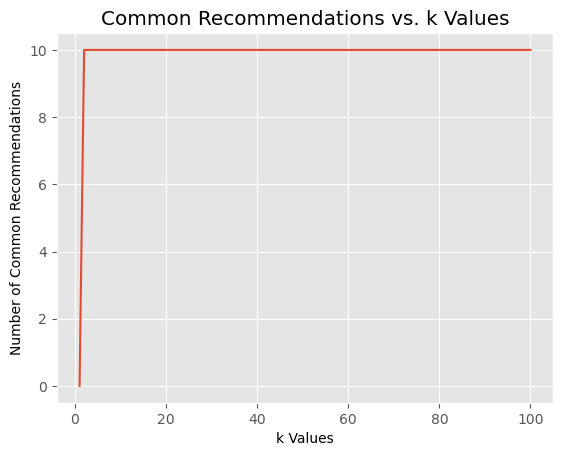

In [72]:
# Calculate the number of common recommendations between consecutive k values
common_recommendations_count = {}
prev_recommendations = set()

for k_test in k_values:
    current_recommendations = set(common_recommendations[k_test])
    common_count = len(prev_recommendations.intersection(current_recommendations))
    common_recommendations_count[k_test] = common_count
    prev_recommendations = current_recommendations

# Plot the results
plt.plot(k_values, list(common_recommendations_count.values()))
plt.xlabel("k Values")
plt.ylabel("Number of Common Recommendations")
plt.title("Common Recommendations vs. k Values")
plt.show()